# QuickSort and MergeSort analysis.
## Author: Vadym Tunik.

In [2]:
from time import time
import numpy as np
import sys 
sys.setrecursionlimit(10**6)
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import permutations


#### Average number of comparisons in QuickSort.

In [3]:
def C_n_1(n):
    if n == 0:
        return 0
    
    C_sum = 0
    for i in range(1,n+1):
        C_sum += C_n_1(i-1) + C_n_1(n-i)
    C_sum /= n
    C_sum += n + 1
    return C_sum

for i in range(1, 11):
    print(C_n_1(i))

2.0
5.0
8.666666666666668
12.833333333333334
17.400000000000002
22.300000000000004
27.48571428571429
32.92142857142858
38.57936507936509
44.43730158730159


In [4]:
def C_n_2(n):
    if n == 0:
        return 0
    
    C_res = C_n_2(n-1) * (n+1) / n + 2
    return C_res

for i in range(1, 11):
    print(C_n_2(i))

2.0
5.0
8.666666666666668
12.833333333333336
17.400000000000002
22.3
27.485714285714288
32.92142857142858
38.57936507936509
44.437301587301604


In [5]:
n = 10

t11 = time()
C_n_1(n)
t12 = time()
diff_t1 = t12-t11

n = 2 * 10 **3 
t21 = time()
C_n_2(n)
t22 = time()
diff_t2 = t22-t21

print(f"Time of work by the first method: {diff_t1} \nTime of work with the second method: {diff_t2}")

Time of work by the first method: 0.024932146072387695 
Time of work with the second method: 0.001994609832763672


In [6]:
# 1.б-в
def C_n_approx(n:int) -> float:
    return 2*(n+1)*(np.log(n+1)+np.euler_gamma-1)

n =  10**5
t11 = time()
C_n_approx_value = C_n_approx(n)
t12 = time()
diff_t1 = t12-t11

t21 = time()
C_n_2_value = C_n_2(n)
t22 = time()
diff_t2 = t22-t21
print(f"{n=}")
print(f"Result by approximate method: {C_n_approx_value}")
print(f"Result by another recursive method: {C_n_2_value}")
error = np.abs(C_n_approx_value-C_n_2_value)/C_n_2_value
print(f"Approximation error: {error}")
print(f"Approximation method runtime: {diff_t1} \nHour of work of another recursive method: {diff_t2}")

n=100000
Result by approximate method: 2218052.406266612
Result by another recursive method: 2218053.4062649393
Approximation error: 4.5084501776203374e-07
Approximation method runtime: 0.0 
Hour of work of another recursive method: 0.03789854049682617


### Comparison of QS and MS for sorting large arrays.

In [7]:
arrays_total = []

for n in [10**4, 10**5, 10**6]:
    arrays = []
    for _ in range(10**2):
        arr = np.array(range(1, n+1))
        np.random.shuffle(arr)
        arrays.append(arr)
    arrays_total.append(np.array(arrays))

arrays_total

[array([[7698, 5677, 3096, ..., 9500, 5807, 5463],
        [1168, 5943, 1463, ..., 8442, 8014, 2995],
        [7624, 5488, 6477, ..., 9136, 3340, 8551],
        ...,
        [8153, 4698, 4897, ..., 5103, 2487,  763],
        [8067,    5, 1761, ..., 7002, 4536, 9078],
        [5074, 5233,  282, ..., 6190, 7279, 8151]]),
 array([[12659, 85692, 73910, ..., 39060, 55502, 24628],
        [87925, 63314, 91472, ..., 18310, 15132, 92773],
        [38345, 81684, 39512, ..., 69391, 92135, 20245],
        ...,
        [33575,  1803, 59104, ..., 49408, 27607, 34750],
        [52553, 49255, 73086, ..., 82906,  5644, 42058],
        [33218, 94782, 90029, ..., 91085, 93856, 60145]]),
 array([[672443, 839892, 731520, ..., 786090, 944451, 653308],
        [493261, 615801,  30924, ..., 759229, 149056,  41290],
        [604728, 755803, 760804, ..., 538168, 326397, 423791],
        ...,
        [749090, 879964, 454226, ..., 127014,  49163, 439755],
        [291688, 338586, 914219, ..., 137969, 338435, 448

In [8]:
def QS(arr, p, q):
    if p>=q: return

    pivot = arr[p + (q-p)//2]
    left = p
    right = q

    while True:
        while pivot > arr[left]:
            left += 1
        while pivot < arr[right]:
            right -= 1

        if left>=right: break

        arr[left], arr[right] = arr[right], arr[left]
        left += 1
        right -= 1

    QS(arr, p, right)
    QS(arr, right+1, q)

def MS(list_):
    if len(list_) <= 1:
        return list_
    
    mid = len(list_)//2

    lef_ = list_[:mid]
    right_ = list_[mid:]

    lef_ = MS(lef_)
    right_ = MS(right_)

    i=0
    j=0
    
    empty_array = []

    while i<len(lef_) and j<len(right_):
        if lef_[i]<right_[j]:
            
            empty_array.append(lef_[i])
            i=i+1

        else:
            
            empty_array.append(right_[j])
            j=j+1

        

    while i<len(lef_):
        
        empty_array.append(lef_[i])
        i=i+1
       

    while j<len(right_):
        
        empty_array.append(right_[j])

        j=j+1
        
    return empty_array
    
    

list_ = [1, 12, 7, 26, 25, 77, 43]
print(f'{MS(list_)=}')
print(f'{list_=}')
QS(list_, 0, len(list_)-1)
list_

MS(list_)=[1, 7, 12, 25, 26, 43, 77]
list_=[1, 12, 7, 26, 25, 77, 43]


[1, 7, 12, 25, 26, 43, 77]

In [9]:
for arrays in arrays_total:
    print(f'n={arrays.shape[1]}')
    amount_of_arrays = len(arrays)
    t1_sum = 0
    t2_sum = 0
    for array in arrays:
        t11 = time()
        MS(array)
        t12 = time()
        diff_t1 = t12-t11
        t1_sum += diff_t1

        t21 = time()
        QS(array, 0, len(array)-1)
        t22 = time()
        diff_t2 = t22-t21
        t2_sum += diff_t2
    
    print(f"sort time of MergeSort: {t1_sum/amount_of_arrays}\nsort time of QuickSort: {t2_sum/amount_of_arrays}")

n=10000
sort time of MergeSort: 0.030734853744506838
sort time of QuickSort: 0.033073949813842776
n=100000
sort time of MergeSort: 0.3797311902046204
sort time of QuickSort: 0.4102670860290527
n=1000000
sort time of MergeSort: 4.632681696414948
sort time of QuickSort: 4.799953629970551


### Prediction of QS and MS operation time for sorting large arrays.

In [10]:
n=10**4
sort_time_of_MergeSort = 0.034276039600372316
sort_time_of_QuickSort = 0.03819121599197388

C_Q = sort_time_of_QuickSort / (n * np.log(n))
C_M = sort_time_of_MergeSort / (n * np.log(n))

print(f"{n=}, {C_Q=}, {C_M=}")

n=10000, C_Q=4.14655859062237e-07, C_M=3.721473714984759e-07


In [11]:
n=10**5
sort_time_of_MergeSort = 0.4130317449569702
sort_time_of_QuickSort = 0.4416961765289307

C_M = sort_time_of_MergeSort / (n * np.log(n))
C_Q = sort_time_of_QuickSort / (n * np.log(n))

print(f"{n=}, {C_Q=}, {C_M=}")

n=100000, C_Q=3.8365242428855837e-07, C_M=3.5875481537136683e-07


In [12]:
# Forecasts

for n in [10**7, 10**6]:
    predict_sort_time_of_QuickSort = C_Q * n * np.log(n)
    predict_sort_time_of_MergeSort = C_M * n * np.log(n)
    print(f"{n=}, {predict_sort_time_of_QuickSort=}, {predict_sort_time_of_MergeSort=}")

 
true_M = 4.927130486965179
true_Q = 4.822188384532929
error_M = np.abs(predict_sort_time_of_MergeSort-true_M)/true_M
error_Q = np.abs(predict_sort_time_of_QuickSort-true_Q)/true_Q
print(f"Forecast errors: {error_M=}, {error_Q=}")

n=10000000, predict_sort_time_of_QuickSort=61.83746471405029, predict_sort_time_of_MergeSort=57.82444429397583
n=1000000, predict_sort_time_of_QuickSort=5.300354118347167, predict_sort_time_of_MergeSort=4.956380939483642
Forecast errors: error_M=0.005936610080826065, error_Q=0.09915948853179302


### Average complexity of QuickSort.

In [252]:
def get_QS_compares(arr:list) -> int:
    global counter
    counter = 0 

    def QS_modified(arr, p, q):
        global counter
        
        counter += 1 
        if p>=q: return

        pivot = arr[p + (q-p)//2]
        left = p
        right = q

        while True:
            
            while pivot > arr[left]:
                left += 1
                counter += 1
            
            while pivot < arr[right]:
                right -= 1
                counter += 1

            counter += 1 
            if left>=right: break
        

            arr[left], arr[right] = arr[right], arr[left]
            left += 1
            right -= 1

        QS_modified(arr, p, right)
        QS_modified(arr, right+1, q)

    QS_modified(arr, 0, len(arr)-1)
    
    return counter


list_ = np.random.randint(0, 100,100)

C_n_approx(len(list_)), get_QS_compares(list_)

(846.8519087120441, 949)

In [257]:
arrays_total_for_scatter = []
n_list = list(range(10, 10**4+1, 100))

for n in tqdm(n_list):
    arrays = []
    for _ in range(10**2):
        arr = np.array(range(1, n+1))
        np.random.shuffle(arr)
        arrays.append(arr)
    arrays_total_for_scatter.append(np.array(arrays))


100%|██████████| 100/100 [00:04<00:00, 24.06it/s]


In [258]:
compares_list_total = []
for arrays in tqdm(arrays_total_for_scatter):
    compares_list = []
    for array in arrays:
        compares = get_QS_compares(arr=array)
        compares_list.append(compares)
    compares_list_total.append(compares_list)

100%|██████████| 100/100 [03:23<00:00,  2.03s/it]


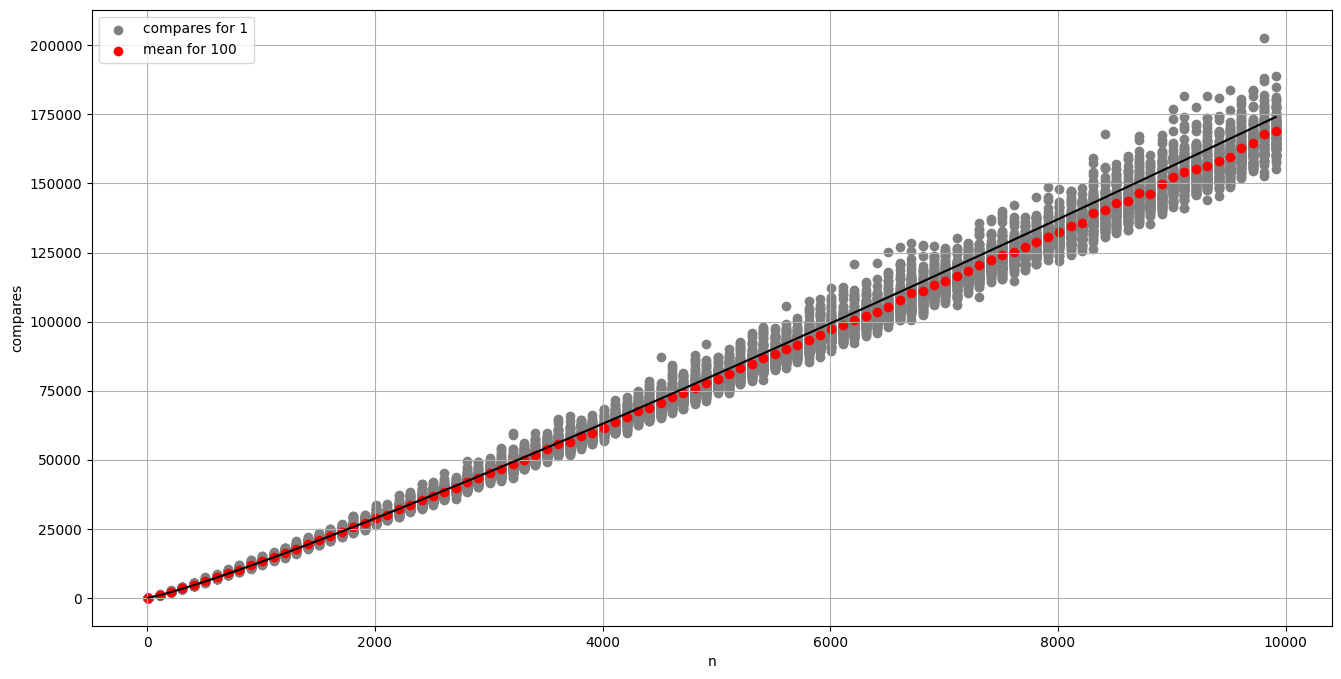

In [259]:
fig, ax = plt.subplots(figsize=(16, 8))

for i in range(len(compares_list_total)):
    compares_list = compares_list_total[i]
    compares_list_mean = np.mean(compares_list)
    n_list_for_scatter = [n_list[i]] * len(compares_list)
    ax.scatter(n_list_for_scatter, compares_list, c='grey')
    ax.scatter(n_list[i], compares_list_mean, c='red')

n_list = np.array(n_list)
C_n_list = C_n_approx(n_list)
ax.plot(n_list, C_n_list, c='black')

ax.set_ylabel('compares')
ax.set_xlabel('n')
ax.legend(['compares for 1', 'mean for 100'])
ax.grid()

### Complexity distribution of QuickSort and MergeSort. 

In [12]:
def generate_permutations(n):
    return list(permutations(range(1, n+1)))

generate_permutations(3)

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [26]:
def get_MS_compares(arr:list) -> int:
    global counter
    counter = 0 

    def MS_modified(list_):
        global counter

        counter += 1
        if len(list_) <= 1:
            return list_
        
        mid = len(list_)//2

        lef_ = list_[:mid]
        right_ = list_[mid:]

        lef_ = MS_modified(lef_)
        right_ = MS_modified(right_)

        i=0
        j=0
        
        empty_array = []

        while i<len(lef_) and j<len(right_):
            counter += 1
            if lef_[i]<right_[j]:
                
                empty_array.append(lef_[i])
                i=i+1
                #counter += 1

            else:
                
                empty_array.append(right_[j])
                j=j+1
                # counter += 1

            

        while i<len(lef_):
            
            empty_array.append(lef_[i])
            i=i+1
            counter += 1
        

        while j<len(right_):
            
            empty_array.append(right_[j])

            j=j+1
            counter += 1
            
        return empty_array
    
    MS_modified(arr)
    
    return counter

print(get_MS_compares([1,2,3,4,5,6,7,8,9]))

46


In [27]:
all_compares = []
for n in [9]:
    all_permutations = generate_permutations(n)
    counter_compares = []
    for i in tqdm(range(len(all_permutations))):
        c_compare_current = get_MS_compares(list(all_permutations[i]))
        counter_compares.append(c_compare_current)
    all_compares.append(counter_compares)

100%|██████████| 362880/362880 [00:07<00:00, 51348.15it/s]


([46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  46

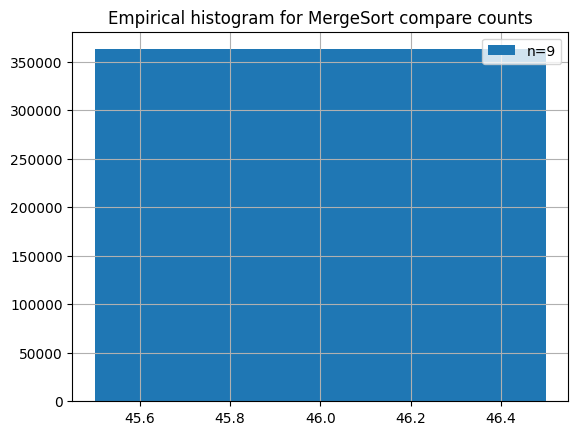

In [28]:
plt.hist(all_compares[0], bins = 'auto', label='n=9')
# plt.hist(all_compares[1], bins = 12, label='n=10')
plt.legend()
plt.grid()
plt.title('Empirical histogram for MergeSort compare counts')
plt.show()

In [29]:
def get_QS_compares(arr:list) -> int:
    global counter
    counter = 0 

    def QS_modified(arr, p, q):
        global counter
        
        counter += 1 
        if p>=q: return

        pivot = arr[p + (q-p)//2]
        left = p
        right = q

        while True:
            
            while pivot > arr[left]:
                left += 1
                # counter += 1
            
            while pivot < arr[right]:
                right -= 1
                # counter += 1

            counter += 2 
            if left>=right: break
        

            arr[left], arr[right] = arr[right], arr[left]
            left += 1
            right -= 1

        QS_modified(arr, p, right)
        QS_modified(arr, right+1, q)

    QS_modified(arr, 0, len(arr)-1)
    
    return counter

In [32]:
all_compares2 = []
for n in [10]:
    all_permutations = generate_permutations(n)
    counter_compares = []
    for i in tqdm(range(len(all_permutations))):
        c_compare_current = get_QS_compares(list(all_permutations[i]))
        counter_compares.append(c_compare_current)
    all_compares2.append(counter_compares)

100%|██████████| 3628800/3628800 [00:42<00:00, 86043.45it/s]


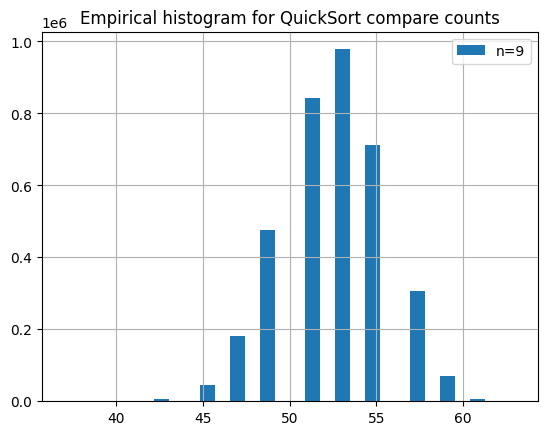

In [33]:
# plt.hist(all_compares2[1], bins = 30, label='n=10')
plt.hist(all_compares2[0], bins = 30, label='n=9')
plt.legend()
plt.grid()
plt.title('Empirical histogram for QuickSort compare counts')
plt.show()